In [1]:
# ML program to implement k-nn classifier
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Reading MNIST handwritten digit dataset
digit = pd.read_csv("C:/Users/HP/Desktop/digit.csv.csv")
digit.shape
# Displaying first 5 records
digit.head(n=5)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [2]:

# Separating dataset : features as x and class labels as y
# Features
x = digit.drop('label', axis =1)
# Classlabels
y = digit['label']
# For train test splitting import
from sklearn.model_selection import train_test_split
# Split dataset into training and testing set 70:30
x_train, x_test, y_train, y_test = train_test_split(x , y, test_size = 0.3, random_state = 42)
print("\n For training")
print(x_train.shape, y_train.shape)
print("\n For testing")
print(x_test.shape, y_test.shape)


 For training
(29400, 784) (29400,)

 For testing
(12600, 784) (12600,)


In [3]:
# Perform standardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)
# For k-nearest neighbor classifier import
from sklearn.neighbors import KNeighborsClassifier
# k-nn classifier 
knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
knn.fit(x_train, y_train)
# Predict on dataset which model has not seen before
y_pred = knn.predict(x_test)
print(y_pred)

[8 1 9 ... 5 5 0]


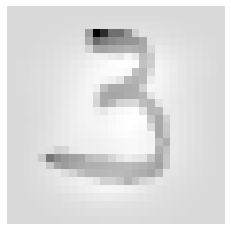

The predicted digit Label is: 3


In [4]:
# Predicting particular digit 
import matplotlib
dig = x_test[360]
# Plot digit image
dig_img = dig.reshape((28,28))
plt.figure()
plt.imshow(dig_img, cmap=matplotlib.cm.binary)
plt.axis('off')
plt.show()
prediction = knn.predict(dig.reshape(1, -1))[0]
print("The predicted digit Label is:", prediction)



In [5]:

# Calculate the confusion matrix and accuracy of the model
from sklearn.metrics import confusion_matrix, accuracy_score
print("Confusion Matrix:\n",confusion_matrix(y_test, y_pred))
print("Accuracy : ",accuracy_score(y_test, y_pred)*100)

Confusion Matrix:
 [[1183    0    3    0    0    2   11    0    0    1]
 [   0 1381    4    0    0    1    2    0    1    0]
 [  15   14 1205   21    2    3    9    9   11    5]
 [   5    4    7 1273    0   25    1   15   16    9]
 [   2   12   13    2 1142    6    7    4    0   34]
 [   5    5    6   44    2  986   22    3    3    9]
 [  20    4    7    0    5   10 1209    0    1    0]
 [   2   24    9    7   16    0    0 1250    0   51]
 [  10   15    6   29   14   45    7    2 1070   11]
 [  10    3    7   16   20    3    0   45    6 1121]]
Accuracy :  93.80952380952381
